## Importing the relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()
pd.options.mode.chained_assignment = None

## Importing the Data and Pre-processing 

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value']=df_comp.ftse

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The LLR Test

In [5]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

## Creating Returns

In [6]:
df['returns'] = df.market_value.pct_change(1)*100

## ACF for Returns

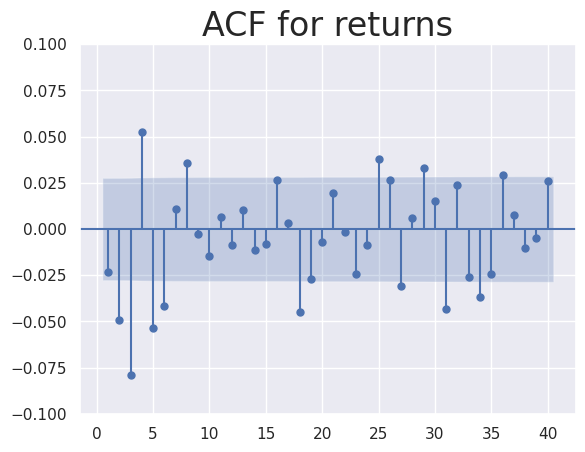

In [7]:
sgt.plot_acf(df.returns[1:],zero=False,lags=40)
plt.title("ACF for returns",size="24")
plt.ylim(-0.1,0.1)
plt.show()

## MA(1) for Returns

In [10]:
ma_ret1=ARIMA(df.returns[1:],order=(0,0,1))
result1=ma_ret1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -7929.595
Date:                Sat, 25 Mar 2023   AIC                          15865.190
Time:                        00:11:44   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.146      0.252      -0.013       0.051
ma.L1         -0.0257      0.009     -3.018      0.003      -0.042      -0.009
sigma2         1.3789      0.014     99.990      0.000       1.352       1.406
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7852.85
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Higher-Lag MA Models for Returns

In [11]:
ma_ret2=ARIMA(df.returns[1:],order=(0,0,2))
result2=ma_ret2.fit()
print(result2.summary())
print("\nLLR test p-value = "+str(LLR_test(ma_ret1,ma_ret2)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -7922.864
Date:                Sat, 25 Mar 2023   AIC                          15853.728
Time:                        00:13:04   BIC                          15879.812
Sample:                    01-10-1994   HQIC                         15862.868
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.204      0.228      -0.012       0.049
ma.L1         -0.0327      0.009     -3.760      0.000      -0.050      -0.016
ma.L2         -0.0502      0.008     -6.416      0.0

The p-value is 0, which means the MA(2) is better

In [12]:
ma_ret3=ARIMA(df.returns[1:],order=(0,0,3))
result3=ma_ret3.fit()
print(result3.summary())
print("\nLLR test p-value = "+str(LLR_test(ma_ret2,ma_ret3)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -7904.317
Date:                Sat, 25 Mar 2023   AIC                          15818.634
Time:                        01:07:39   BIC                          15851.240
Sample:                    01-10-1994   HQIC                         15830.060
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.296      0.195      -0.010       0.048
ma.L1         -0.0203      0.009     -2.334      0.020      -0.037      -0.003
ma.L2         -0.0556      0.008     -7.032      0.0

we can go until to MA(7)

In [13]:
ma_ret6=ARIMA(df.returns[1:],order=(0,0,6))
result6=ma_ret6.fit()
print(result6.summary())


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 6)   Log Likelihood               -7889.221
Date:                Sat, 25 Mar 2023   AIC                          15794.442
Time:                        01:10:46   BIC                          15846.612
Sample:                    01-10-1994   HQIC                         15812.723
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.014      1.318      0.188      -0.009       0.047
ma.L1         -0.0237      0.009     -2.562      0.010      -0.042      -0.006
ma.L2         -0.0486      0.008     -5.982      0.0

In [14]:
ma_ret7=ARIMA(df.returns[1:],order=(0,0,7))
result7=ma_ret7.fit()
print(result7.summary())
print("\nLLR test p-value = "+str(LLR_test(ma_ret6,ma_ret7)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 7)   Log Likelihood               -7889.046
Date:                Sat, 25 Mar 2023   AIC                          15796.091
Time:                        01:11:11   BIC                          15854.782
Sample:                    01-10-1994   HQIC                         15816.657
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.303      0.193      -0.010       0.047
ma.L1         -0.0247      0.009     -2.645      0.008      -0.043      -0.006
ma.L2         -0.0488      0.008     -6.000      0.0

we have a high LLR value, which means following the general rule of thumb that we should stop here, but looking at the ACF we see that the 8th lag is quite significant, for that reason we will bend that rule :

In [15]:
ma_ret8=ARIMA(df.returns[1:],order=(0,0,8))
result8=ma_ret8.fit()
print(result8.summary())
print("\nLLR test p-value = "+str(LLR_test(ma_ret7,ma_ret8)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 8)   Log Likelihood               -7885.603
Date:                Sat, 25 Mar 2023   AIC                          15791.205
Time:                        01:12:55   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.253      0.210      -0.011       0.048
ma.L1         -0.0238      0.009     -2.527      0.011      -0.042      -0.005
ma.L2         -0.0495      0.008     -6.053      0.0

In [16]:
LLR_test(ma_ret6,ma_ret8,DF=2)

0.027

The p-value is less than 0.05, which means using 5% significance level the MA(8) performs better.

## Residuals for Returns

In [19]:
df['res_ret_ma8']=result8.resid[1:]

In [32]:
print("mean of residuals : "+str(round(df.res_ret_ma8.mean(),3)))
print("variance of residuals : "+str(round(df.res_ret_ma8.var(),3)))

mean of residuals : -0.0
variance of residuals : 1.356


In [35]:
print("Standard deviation : "+str(round(sqrt(df.res_ret_ma8.var()),3)))

Standard deviation : 1.164


since guassian white noise implies normality, we can apply the the rule of 68 ,95, 99.7 rule, and expect that most return will fall within the interval -3* standard deviation and 3* standard deviation, so at worst case scenario we will be 7% off the actual value(7 being the length of the interval).

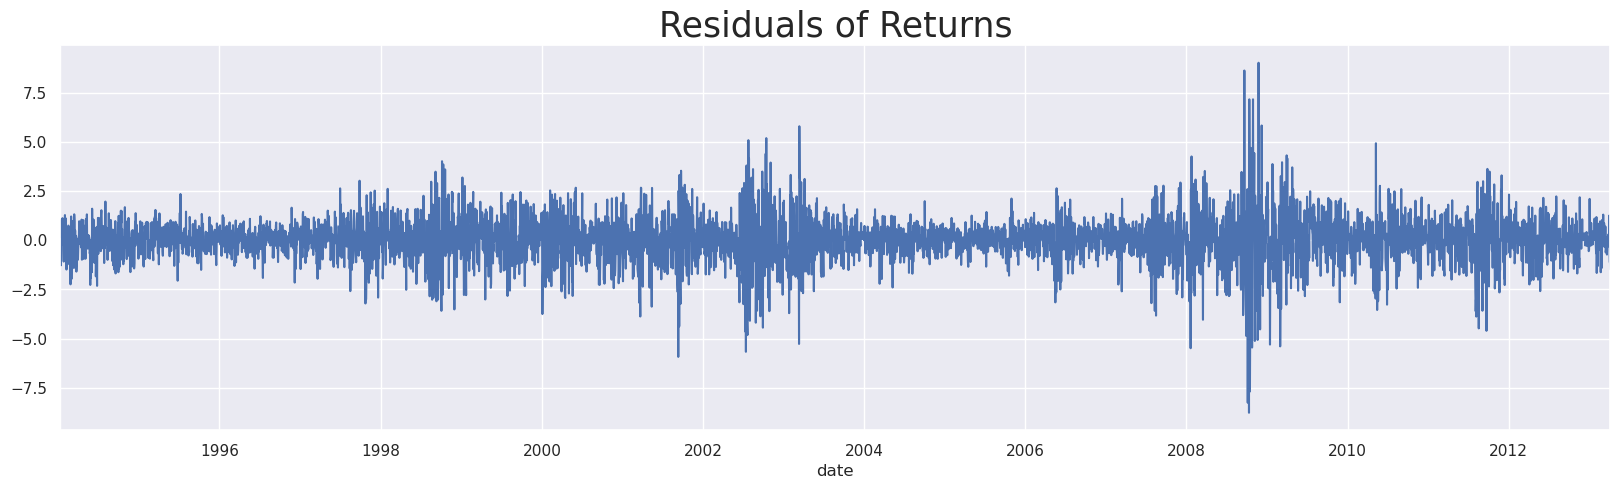

In [38]:
df.res_ret_ma8[1:].plot(figsize=(20,5))
plt.title("Residuals of Returns",size=25)
plt.show()

In [39]:
sts.adfuller(df.res_ret_ma8[2:])

(-70.83537125693975,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 15684.052217389284)

The residuals series is indeed stationnary, we sould examine the ACF of the residuals to see if it is white noise.

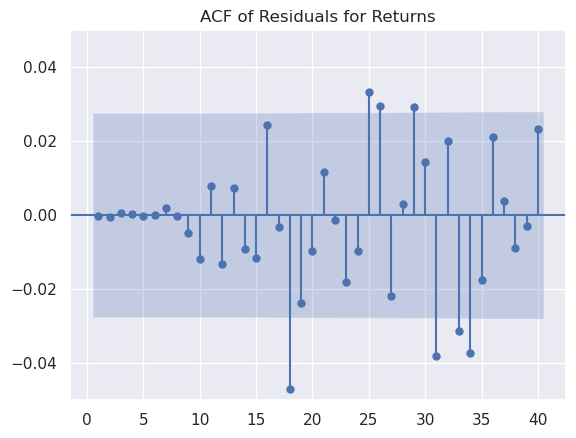

In [43]:
sgt.plot_acf(df.res_ret_ma8[2:],zero=False,lags=40)
plt.title("ACF of Residuals for Returns")
plt.ylim(-0.05,0.05)
plt.show()

we see that most lags are insignificant, most pricisely, the first are basically 0 because we used them for the model.

## Normalized Returns

In [45]:
bench_ret=df.returns.iloc[1]
df['norm_ret']=df.returns.div(bench_ret).mul(100)

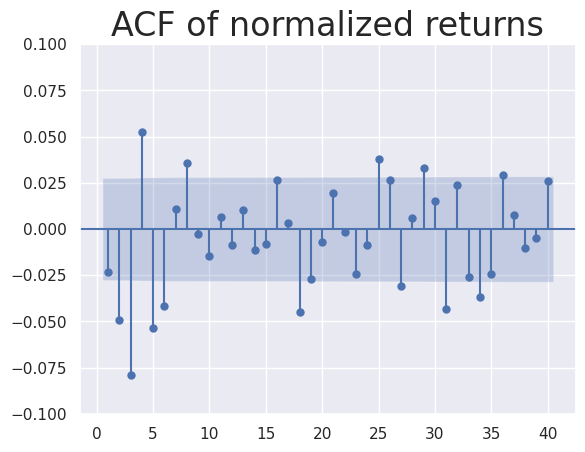

In [47]:
sgt.plot_acf(df.norm_ret[1:],zero=False,lags=40)
plt.title("ACF of normalized returns",size=24)
plt.ylim(-0.1,0.1)
plt.show()

Comment:the ACF of the normalized returns doesn't show any difference than the non normalized values, unsurprisingly, the graph suggests using an MA(6) or an MA(8).to be dilient, it is best to test the model on the normalized returns and see the coefficients

In [48]:
ma_norm_ret8=ARIMA(df.returns[1:],order=(0,0,8))
result_norm8=ma_norm_ret8.fit()
print(result_norm8.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 8)   Log Likelihood               -7885.603
Date:                Sat, 25 Mar 2023   AIC                          15791.205
Time:                        03:05:10   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.253      0.210      -0.011       0.048
ma.L1         -0.0238      0.009     -2.527      0.011      -0.042      -0.005
ma.L2         -0.0495      0.008     -6.053      0.0

Once again, we can see that normalizing the data doesn't affect the model selection.

## Residuals for normalized returns

In [49]:
df['res_norm_ret_ma8']=result_norm8.resid[1:]

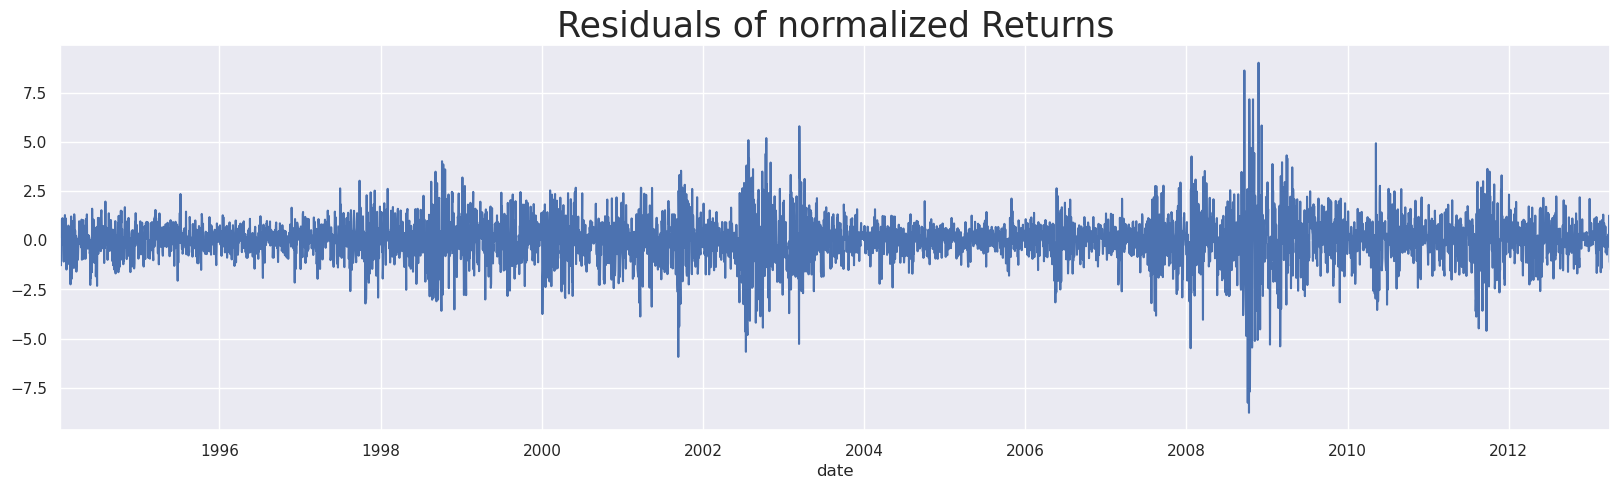

In [50]:
df.res_norm_ret_ma8[1:].plot(figsize=(20,5))
plt.title("Residuals of normalized Returns",size=25)
plt.show()

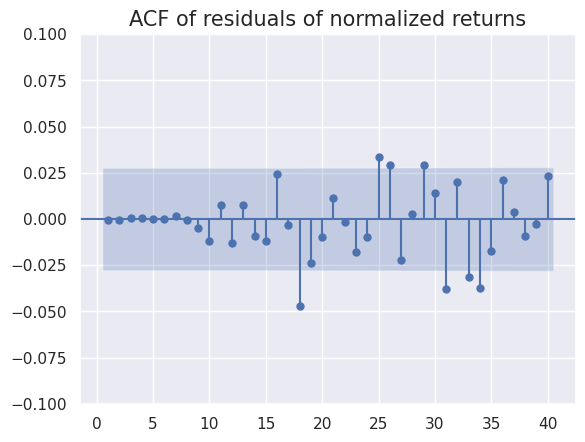

In [55]:
sgt.plot_acf(df.res_norm_ret_ma8[2:],zero=False,lags=40)
plt.title("ACF of residuals of normalized returns",size=15)
plt.ylim(-0.1,0.1)
plt.show()

## MA Models For Prices

we already seen that AR models don't perform well with non stationnary data, let's see if the same applies to MA models :

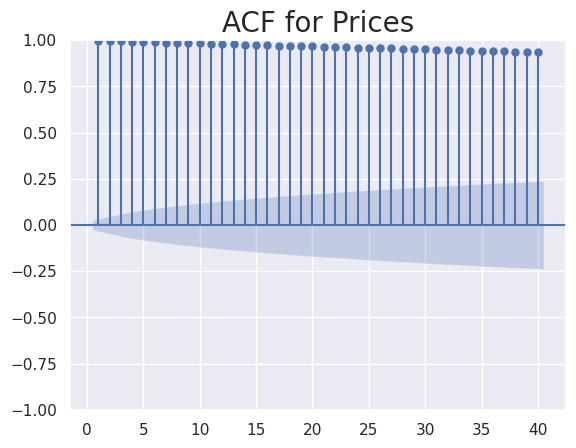

In [58]:
sgt.plot_acf(df.market_value,zero=False,lags=40)
plt.title("ACF for Prices",size=20)
plt.show()

In [59]:
ma_prices1=ARIMA(df.market_value,order=(0,0,1))
result_prices1=ma_prices1.fit()
print(result_prices1.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -38629.000
Date:                Sat, 25 Mar 2023   AIC                          77264.000
Time:                        03:43:23   BIC                          77283.564
Sample:                    01-07-1994   HQIC                         77270.856
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6316     15.834    321.441      0.000    5058.598    5120.665
ma.L1          0.9573      0.004    231.410      0.000       0.949       0.965
sigma2      2.817e+05   8160.539     34.519      0.0

The ACF shows high correlation, which means we need an autoregressive logic in the model.